In [1]:
import pandas as pd
import numpy as np
import os
import re
pd.options.mode.chained_assignment = None 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline


# Load Data

In [2]:
df_diabetes = pd.read_csv("../dataset_diabetes/diabetic_data.csv", 
                          na_values = ['', '?'], low_memory=False)
df_diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Voy a mapear las variables que encontré en el archivo de mappings del [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00296/). Cada ```tabla``` dentro del archivo ```IDs_mapping.csv``` contiene una serie de mappings que serán mapeados a la tabla de la información de diabetes. Nombraré cada subtabla con la columna a la que hace referencia el mapeo de cada una. De esta manera saldrán 3 tablas `.CSV` cada una haciendo referencia a cada uno de los mappings que tiene cada columna en cuestión.

In [3]:
mapping_cols = [re.sub('.csv', '', re.sub('IDs_mapping_', '', x)) \
                for x in os.listdir('../dataset_diabetes/') if 'IDs_mapping_' in x]

mapping_cols

['admission_source_id', 'admission_type_id', 'discharge_disposition_id']

Voy a verificar que cada una de estas columnas esté en el listado de columnas del dataframe ```diabetes```

In [4]:
all(x in df_diabetes.columns for x in mapping_cols)

True

Como cada columna a mapear está en el listado, entonces mapearé cada una de las columnas con los valores del archivo de mappings a cada columna en la tabla ```diabetes```

In [5]:
for col in mapping_cols:
    df_mapping_col = pd.read_csv('../dataset_diabetes/IDs_mapping_%s'%col + '.csv', sep = ';')
    mapping_dict = {}
    for key_, value_ in zip(df_mapping_col[col].values, df_mapping_col['description'].values):
        mapping_dict[key_] = value_
        
    df_diabetes[col] = df_diabetes[col].map(mapping_dict)

df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Acá ya se puede observar al menos con las primeras 5 filas que ya las columnas ```'admission_source_id', 'admission_type_id', 'discharge_disposition_id'``` fueron respectivamente mapeadas. Pues ya no contienen valores numéricos que contenía el archivo una vez fue cargado.

# Mapping Labels

Voy a organizar un poco los labels de las variables a las que se les aplicó el mapping. Son variables que conozco el significado de la etiqueta. Crearé una nueva variable para saber si me dice algo después de la creación del modelo. 

In [6]:
print(df_diabetes.admission_type_id.unique())

mask_na_values = pd.isna(df_diabetes.admission_type_id)
mask_invalid_values = df_diabetes.admission_type_id == 'Not Available'

df_diabetes.loc[mask_na_values | mask_invalid_values, 'admission_type_id'] = 'Not Mapped'

print(df_diabetes.admission_type_id.unique())

[nan 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Available'
 'Not Mapped' 'Trauma Center']
['Not Mapped' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']


Aquí creé una sola etiqueta que agrupa las etiquetas que nunca fueron mapeadas: la etiqueta `Not Mapped`, la etiqueta `Not Available` y el valor `nan`

In [7]:
print(df_diabetes.discharge_disposition_id.unique())

mask_na_values = pd.isna(df_diabetes.discharge_disposition_id)
mask_invalid_values = df_diabetes.discharge_disposition_id == 'Unknown/Invalid'

df_diabetes.loc[mask_na_values | mask_invalid_values, 'discharge_disposition_id'] = 'Not Mapped'
df_diabetes['Hospice'] = df_diabetes.discharge_disposition_id\
    .str.lower().str.contains('hospice|expired', regex=True)

['Not Mapped' 'Discharged to home' 'Discharged/transferred to SNF'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to another type of inpatient care institution'
 'Expired' 'Left AMA'
 'Neonate discharged to another hospital for neonatal aftercare'
 'Discharged/transferred to ICF' 'Hospice / medical facility' nan
 'Discharged/transferred to home under care of Home IV provider'
 'Hospice / home'
 'Still patient or expected to return for outpatient services'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred to another rehab fac including rehab units of a hospital .'
 'Discharged/transferred to a long term care hospital.'
 'Admitted as an inpatient to this hospital'
 'Expired in a medical facility. Medicaid only, hospice.'
 'Discharged/transferred within this institu

In [8]:
print(df_diabetes.admission_source_id.unique())

mask_na_values = pd.isna(df_diabetes.admission_source_id)
mask_invalid_values = df_diabetes.admission_source_id == 'Unknown/Invalid'
mask_not_available = df_diabetes.admission_source_id.str.strip('123.!? \n\t').str.lower().str == 'not available'

df_diabetes.loc[mask_na_values | mask_invalid_values | mask_not_available, 'admission_source_id'] = 'Not Mapped'
df_diabetes['admission_source_id'] = df_diabetes.admission_source_id.str.strip('123.!? \n\t').str.strip()
print(df_diabetes.admission_source_id.unique())

[' Physician Referral' ' Emergency Room' 'Clinic Referral'
 'Transfer from a hospital'
 ' Transfer from a Skilled Nursing Facility (SNF)'
 ' Transfer from another health care facility' ' Not Mapped'
 'HMO Referral' nan ' Court/Law Enforcement' ' Not Available'
 ' Extramural Birth' ' Transfer from critial access hospital'
 ' Transfer from hospital inpt/same fac reslt in a sep claim'
 'Normal Delivery' ' Transfer from Ambulatory Surgery Center' ' Sick Baby']
['Physician Referral' 'Emergency Room' 'Clinic Referral'
 'Transfer from a hospital'
 'Transfer from a Skilled Nursing Facility (SNF)'
 'Transfer from another health care facility' 'Not Mapped' 'HMO Referral'
 'Court/Law Enforcement' 'Not Available' 'Extramural Birth'
 'Transfer from critial access hospital'
 'Transfer from hospital inpt/same fac reslt in a sep claim'
 'Normal Delivery' 'Transfer from Ambulatory Surgery Center' 'Sick Baby']


Ahora procederé a realizar un análisis mínimo de la data y entender algunas variables. Generaré un archivo html a parte y utilizaré la librería pandas-profiling.

In [9]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_diabetes, minimal = True)
prof.to_file(output_file='output.html') 

Summarize dataset:   0%|          | 0/59 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Según esto, viendo el archivo html que arroja la celda anterior, puedo observar que la columna ```examide, citoglipton``` son constantes en el dataframe. Esto no lo utilizaré en el análisis para propósitos de reducir dimensionalidad.

In [10]:
print(df_diabetes['examide'].unique())
print(df_diabetes['citoglipton'].unique())


['No']
['No']


Se comprueba lo anterior, indicando que solamente tienen el valor ```'No'``` para todo el dataframe


In [11]:
df_diabetes.drop(['examide', 'citoglipton'], axis = 1, inplace = True)
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Hospice
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,NO,False
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,...,Up,No,No,No,No,No,Ch,Yes,>30,False
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,Yes,NO,False
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,...,Up,No,No,No,No,No,Ch,Yes,NO,False
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,False


La variable ```weight``` tiene altísimo porcentaje de valores faltantes. Aquí no es conveniente eliminar toda la fila. Pero indicaré al algoritmo, cuándo la variable tiene valor faltante para así, aprovechar los pocos valores que tenemos. Esto puede no servir en el análisis, tanto para la variable original, como para la nueva que se crea a partir de esta.

In [12]:
display(df_diabetes['weight'].value_counts())
df_diabetes['has_weight'] = np.where(pd.isna(df_diabetes['weight']), 0, 1)

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Existen dos columnas que indican que son IDs en el conjunto de datos. La variable ```encounter_id``` tiene el mismo número de valores únicos como número de filas del dataframe (100% de unicidad), esto indica que es un id único en el dataframe. Por otro lado, la variable ```patient_nbr```también tiene una cardinalidad de valores únicos muy alta. Por lo general, nbr es la abreviación de la palabra number por lo que puede indicar que esta variable puede estar asociada al número de paciente (70,3% de sus valores son únicos en todo el dataframe). Como esta información no la han dado, empezaré a hacer supuestos en la data. 

De esta manera, estas dos columnas no las utilizaré para hacer el análisis.

In [13]:
df_diabetes.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

Voy a retirar los únicos 3 valores que no definieron un género. Puesto que solo representan 3 valores sobre el total del dataframe. Esto no implica mayor cosa, y así sabremos si nos referimos a hombres y mujeres.

In [14]:
print(df_diabetes.gender.value_counts())
mask = df_diabetes['gender'] == 'Unknown/Invalid'
df_diabetes = df_diabetes[~mask]
print(df_diabetes.gender.value_counts())


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
Female    54708
Male      47055
Name: gender, dtype: int64


Voy a llenar los valores faltantes de la variable ```race``` con el estadístico moda. Este estadístico funciona para variables categóricas y sabiendo que según el html, esta variable tiene pocos valores faltantes y que el valor ```'Caucasians'``` predomina en el dataframe para la raza de la persona. 

In [15]:
print(df_diabetes.race.unique())
print()
mask = pd.isna(df_diabetes['race'])
df_diabetes['race'] = df_diabetes['race'].fillna(df_diabetes['race'].mode()[0])
print(df_diabetes.race.unique())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']

['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


Según lo que entendí, desde la columna ```Y:AU``` son columnas de algún procedimiento médico o incluso son dosis de medicamentos. Empezando con la columna ```metformin``` y terminando con la columna ```metformin-pioglitazone```, todos los valores únicos que toman estas variables son ```['No', 'Steady', 'Up', 'Down']```. Con esta información uno podría buscar en Google cuáles medicamentos pueden ser antidiabéticos y cuáles no, y así poder tener un poco más de variables para la creación del modelo. 

In [16]:
meds = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'troglitazone', 'tolazamide', 'insulin', 
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'   
]
unique_values = []
for col in meds:
    unique_values += list(df_diabetes[col].unique())

list(set(unique_values))

['Down', 'Up', 'Steady', 'No']

Se comprueba que en estas columnas solo aparecen los valores que se mencionaron anteriormente. Sin conocer el detalle de cada uno de los medicamentos o procedimientos médicos, miraré cuántos medicamentos o procesos médicos puede llegar a tener un paciente en cualquier momento. Solo usaré el valor ```'No'``` para indicar que no recibió ningún medicamento en ese momento o 1 de lo contrario (porque no sé los niveles en cada uno de los medicamentos y cuándo una dosis es más fuerte que otra).

In [17]:
to_map_meds = {
    'No': 0, 
    'Steady': 1, 
    'Up': 1, 
    'Down': 1
}


df_diabetes['num_meds'] = df_diabetes[meds].replace(list(to_map_meds.keys()), 
                                                    list(to_map_meds.values())).sum(axis = 1)
df_diabetes.num_meds.value_counts()


1    47314
0    23402
2    21871
3     7778
4     1335
5       58
6        5
Name: num_meds, dtype: int64

Lo anterior indica cuántos medicamentos o procedimientos médicos se les hizo a cada paciente. Se puede ver que a todos los pacientes no se les hizo nada, o se les aplicó hasta 6 medicamentos.

Voy a ver qué otras columnas tengo en el dataset para saber qué más se le pueden hacer antes de construir el modelo

In [18]:
new_cols = [
    'num_meds',
    'weight',
    'has_weight',
    'race',
    'gender',
    'Hospice'
]

numeric_cols = df_diabetes.select_dtypes(include=np.number).columns.tolist()

list(set(df_diabetes.columns) - set(meds + new_cols + mapping_cols + numeric_cols))

['diag_2',
 'A1Cresult',
 'change',
 'diag_1',
 'medical_specialty',
 'age',
 'diag_3',
 'max_glu_serum',
 'payer_code',
 'diabetesMed',
 'readmitted']

La variable ```change``` tiene solo dos categorías. La variable ```diabetesMed``` es binaria, hay que transformarla para no hacerle más procesamiento. La variable edad es categórica y la voy a dejar tal cual porque tiene información relevante. Se podría realizar un análisis agrupando edades diferentes con un conocimiento específico en cómo ataca la diabetes y en qué edades principalmente, enfocado en la ubicación geográfica de la persona. 

In [19]:
print(df_diabetes.diabetesMed.unique())
df_diabetes.diabetesMed = np.where(df_diabetes.diabetesMed == 'Yes', 1, 0)
print(df_diabetes.diabetesMed.unique())

['No' 'Yes']
[0 1]


Por ahora no trabajaré ni con las columnas de medicamentos expuestas anteriormente, ni con las columnas ```diag_1, diag_2 y diag_3``` puesto que tiene muchas etiquetas y desconozco el valor de cada etiqueta. Sin embargo las guardaré en otro dataframe para ver si de pronto después las puedo usar. Por otro lado, las columnas ```payer_code``` y ```medical_specialty``` tienen casi el 40% y 50% de valores faltantes, nuevamente, desconozco el valor de la etiqueta y no puedo hacer mayor cosa.

In [20]:
cols_not_used = [
    'weight',
    'medical_specialty',
    'payer_code',
    'diag_1',
    'diag_2',
    'diag_3'
]

df_not_used = df_diabetes[cols_not_used + meds]
df_diabetes.drop(cols_not_used + meds, axis = 1, inplace = True)
df_diabetes.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted', 'Hospice', 'has_weight', 'num_meds'],
      dtype='object')

In [21]:
df_diabetes.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

Voy a realizar algunos gráficos que permiten sacar conclusiones.

In [22]:
bool_cols = [
    'Hospice',
    'diabetesMed',
]

mapping_age = {
    '[0-10)': 10, 
    '[10-20)': 20, 
    '[20-30)': 30, 
    '[30-40)': 40, 
    '[40-50)': 50, 
    '[50-60)': 60,
    '[60-70)': 70, 
    '[70-80)': 80, 
    '[80-90)': 90, 
    '[90-100)': 100
}
target_col = ['target']


df_diabetes_copy = df_diabetes.copy() 
df_diabetes_copy['target'] = (
    (df_diabetes_copy['readmitted']=='<30') |\
    (df_diabetes_copy['readmitted']=='>30')
).astype('int')
df_diabetes_copy.drop('readmitted', axis = 1, inplace = True)
df_diabetes_copy['age'] = df_diabetes_copy['age'].map(mapping_age)

dummy_cols = list(set(df_diabetes_copy.columns) - set(numeric_cols + bool_cols + target_col + ['age']))
df_diabetes_dummies = pd.get_dummies(df_diabetes_copy, columns = dummy_cols, 
                                     prefix = None, drop_first = True)#, prefix = dummy_cols)
df_diabetes_dummies.target = df_diabetes_dummies.target.astype('category')
# df_diabetes_dummies.readmitted = df_diabetes_dummies.readmitted.replace(['NO', '<30', '>30'], [0, 1, 2])
df_diabetes_dummies.Hospice = df_diabetes_dummies.Hospice.astype(int)
df_diabetes_dummies

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,...,discharge_disposition_id_Expired,"discharge_disposition_id_Expired at home. Medicaid only, hospice.","discharge_disposition_id_Expired in a medical facility. Medicaid only, hospice.",discharge_disposition_id_Hospice / home,discharge_disposition_id_Hospice / medical facility,discharge_disposition_id_Left AMA,discharge_disposition_id_Neonate discharged to another hospital for neonatal aftercare,discharge_disposition_id_Not Mapped,discharge_disposition_id_Still patient or expected to return for outpatient services,gender_Male
0,10,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,20,3,59,0,18,0,0,0,9,1,...,0,0,0,0,0,0,0,0,0,0
2,30,2,11,5,13,2,0,1,6,1,...,0,0,0,0,0,0,0,0,0,0
3,40,2,44,1,16,0,0,0,7,1,...,0,0,0,0,0,0,0,0,0,1
4,50,1,51,0,8,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,80,3,51,0,16,0,0,0,9,1,...,0,0,0,0,0,0,0,0,0,1
101762,90,5,33,3,18,0,0,1,9,1,...,0,0,0,0,0,0,0,0,0,0
101763,80,1,53,0,9,1,0,0,13,1,...,0,0,0,0,0,0,0,0,0,1
101764,90,10,45,2,21,0,0,1,9,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_diabetes_dummies

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,...,discharge_disposition_id_Expired,"discharge_disposition_id_Expired at home. Medicaid only, hospice.","discharge_disposition_id_Expired in a medical facility. Medicaid only, hospice.",discharge_disposition_id_Hospice / home,discharge_disposition_id_Hospice / medical facility,discharge_disposition_id_Left AMA,discharge_disposition_id_Neonate discharged to another hospital for neonatal aftercare,discharge_disposition_id_Not Mapped,discharge_disposition_id_Still patient or expected to return for outpatient services,gender_Male
0,10,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,20,3,59,0,18,0,0,0,9,1,...,0,0,0,0,0,0,0,0,0,0
2,30,2,11,5,13,2,0,1,6,1,...,0,0,0,0,0,0,0,0,0,0
3,40,2,44,1,16,0,0,0,7,1,...,0,0,0,0,0,0,0,0,0,1
4,50,1,51,0,8,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,80,3,51,0,16,0,0,0,9,1,...,0,0,0,0,0,0,0,0,0,1
101762,90,5,33,3,18,0,0,1,9,1,...,0,0,0,0,0,0,0,0,0,0
101763,80,1,53,0,9,1,0,0,13,1,...,0,0,0,0,0,0,0,0,0,1
101764,90,10,45,2,21,0,0,1,9,1,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [24]:
X = df_diabetes_dummies.drop(['target'], axis = 1)
y = df_diabetes_dummies['target']

Como el dataset está desbalanceado, usaré el argumento stratify para balancear los conjuntos de datos correspondientes a training y testing.

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score,\
                            accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)


## Model Base

Voy a entrenar un modelo base que será un clasificador binario de RandomForest. Por practicidad y tiempo lo que haré es ver el perfomance de la métrica F1 score y tratar de mejorar este performance, indicando más o menos el umbral de la probabilidad para que sea asignada a una clase o a otra.

In [49]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_base = clf.predict(X_test)

print("F1 score Base model:", metrics.f1_score(y_test, y_pred_base))

F1 score Base model: 0.5737961926091825


Acá empezamos con un F1 score de 0.57 y la idea es mejorarlo. Esto se hace, escogiendo los mejores parámetros posibles para el modelo. Además, escoger un umbral para no sacrificar tanto las otras métricas y poder tener un modelo estable en todas las métricas. Voy a mostrar las variables más importantes o que aportan más información a la variable Readmission del modelo, solo mostraré las primeras 20.

In [50]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance'])\
    .sort_values('importance', ascending=False)

print('DecisionTreesClassifier')
print()
feature_importances.head(15)

DecisionTreesClassifier



,importance
num_lab_procedures,0.162982
num_medications,0.137281
time_in_hospital,0.095804
age,0.078686
number_diagnoses,0.063878
num_procedures,0.062185
number_inpatient,0.060072
num_meds,0.035790
gender_Male,0.028362
number_outpatient,0.024962


Voy a crear una malla de hiperparámetros que considero son los más relevantes en el modelo. Quisiera crear una malla más robusta pero las capacidades de mi PC son limitadas y aumentando el número de hiperparámetros, aumenta drásticamente el tiempo de cómputo y de recursos del PC. 

In [52]:
clf2 = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [5, 6], 
    'n_estimators' : [300],
    'max_depth': [10, 15, 25],
    'max_features': [10, 15, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

In [53]:
def grid_search_wrapper(refit_score='f1_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
#     skf = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(clf2, param_grid, scoring=scorers, refit=refit_score,
                               cv=3, return_train_score=True, n_jobs=-1, verbose=2)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred_model = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_model),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

grid_search_clf = grid_search_wrapper(refit_score='f1_score')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params for f1_score
{'max_depth': 25, 'max_features': 10, 'min_samples_split': 6, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for f1_score on the test data:
     pred_neg  pred_pos
neg      7939      3033
pos      4307      5074


In [54]:
print("F1 score best model fit:",metrics.f1_score(y_test, grid_search_clf.best_estimator_.predict(X_test.values)))


F1 score best model fit: 0.5802836230558097


Aquí, se puede observar cuáles fueron los hiperparámetros que mejores resultados dieron con respecto a la métrica F1. Esto no quiere decir que ya se encontró el óptimo global, pero es el mejor bajo la malla inicialmente dada.

In [55]:
print('Table best scores: ');print()
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_f1_score',
         'param_max_depth', 'param_max_features', 
         'param_min_samples_split', 'param_n_estimators']].round(3).head(5)

Table best scores: 



,mean_test_precision_score,mean_test_f1_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
14,0.620,0.577,25,15,5,300
16,0.618,0.576,25,20,5,300
17,0.618,0.576,25,20,6,300
15,0.621,0.577,25,15,6,300
13,0.626,0.579,25,10,6,300


In [56]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

Voy a realizar un gráfico de Precision Vs Recall. Lo que establece la teoría es que si se quiere tener mejor rendimiento de una métrica, se debe sacrificar la otra. Es por esto que con esta gráfica, usaré un umbral que me mantenga alta la métrica de recall pero que no me sacrifique la métrica precision.

In [57]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

Precision Vs. Recall plot: 



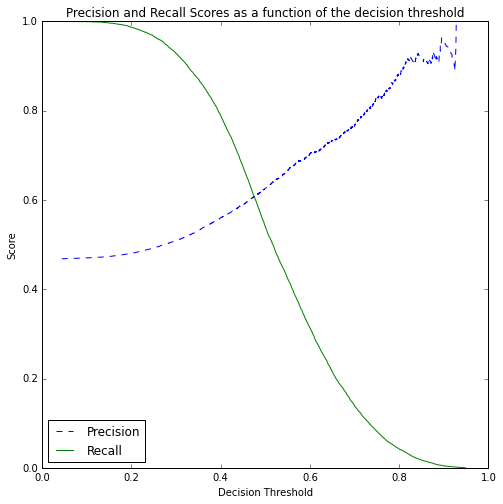

In [58]:
print('Precision Vs. Recall plot: ');print()
plot_precision_recall_vs_threshold(p, r, thresholds)

Se podría pensar que el umbral está alrededor de 0.45 hasta 0.5 más o menos. Yo voy a escoger el umbral de 0.4 ya que quiero mantener un recall un poco mejor debido a la naturaleza del problema.

In [64]:
print("F1 score Best Model with treshold 0.4:",
      metrics.f1_score(y_test, (grid_search_clf.best_estimator_.predict_proba(X_test)[:,1] >= 0.4).astype(bool)))

F1 score Best Model with treshold 0.4: 0.6552578048996197


0.6944163925633227


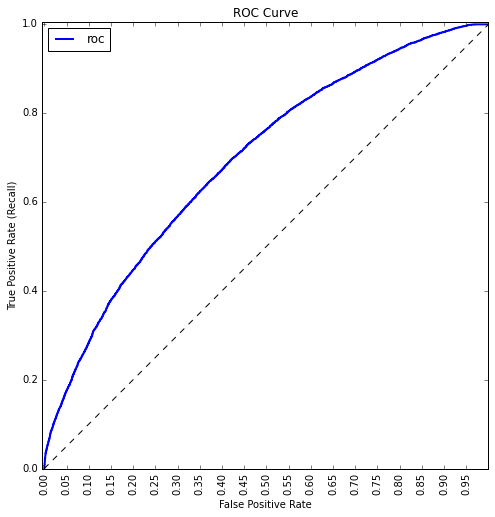

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'roc')

In [66]:

feature_importances = pd.DataFrame(grid_search_clf.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance'])\
    .sort_values('importance', ascending=False)

print('DecisionTreesClassifier')
print()
feature_importances[:20]

DecisionTreesClassifier



,importance
num_lab_procedures,0.128428
num_medications,0.111440
number_inpatient,0.101926
time_in_hospital,0.077628
age,0.066782
number_diagnoses,0.060432
num_procedures,0.053003
num_meds,0.032648
number_outpatient,0.032149
number_emergency,0.028233


Después de todo el proceso de calibración y optimización del umbral de probabilidad para encontrar, lo que para mí eran los mejores scores, los resultados son los siguientes: 0.63 de F1 score, casi 0,06 más que el primer modelo. 

In [67]:

print("Accuracy is {0:.2f}".format(metrics.accuracy_score(y_test, (grid_search_clf.best_estimator_.predict_proba(X_test)[:,1] >= 0.45).astype(bool))))
print("Precision is {0:.2f}".format(metrics.precision_score(y_test, (grid_search_clf.best_estimator_.predict_proba(X_test)[:,1] >= 0.45).astype(bool))))
print("Recall is {0:.2f}".format(metrics.recall_score(y_test, (grid_search_clf.best_estimator_.predict_proba(X_test)[:,1] >= 0.45).astype(bool))))
print("F1 score is {0:.2f}".format(metrics.f1_score(y_test, (grid_search_clf.best_estimator_.predict_proba(X_test)[:,1] >= 0.45).astype(bool))))


Accuracy is 0.63
Precision is 0.59
Recall is 0.67
F1 score is 0.63


# Conclusions 

El modelo aun no está terminado y mejorado del todo. Se hizo un buen avance de cómo mejorar un modelo y cómo optimizar una métrica. La malla que creé para encontrar un óptimo local puede ser mejorada, añadiéndole más combinaciones. Utilicé Cross Validation para evitar posible overfitting en la escogencia de los parámetros, se podría mirar cambiar este valor por otros mayores pero eso depende mucho del tamaño de los datos. 

El gráfico de la curva ROC indica qué tan bueno o malo es un modelo para estimar las readmisiones de los pacientes. Entre más cercano a 1, el modelo es capaz de estimar perfectamente y entre más cercano a 0.5, el modelo no es muy bueno estimando. El resultado del área o curva ROC fue de aproximadamente 0.7, lo que indica que el modelo no es del todo malo y puede llegar a comportarse muy bien estimando los casos de readmisiones.

Claramente, haciendo un mejor proceso de ingeniería de características se puede llegar a extraer más información que ayude a la variable objetivo. Pues habían variables como `'diag_1'`, `'diag_2'`, `'diag_3'`, `'medical_specialty'`, `'payer_code'` y otras como por ejemplo el test `'A1Cresult'` que según lo que leí indica los niveles de un test para gente diabética (de aquí se puede sacar mucha información). 

# Further work

La idea sería realizar el mismo trabajo para diferentes modelos. Yo por falta de tiempo, no pude hacerlo porque cada corrida se demora mucho en mi PC actual. También la idea sería escoger diferentes técnicas de preprocesamiento como estandarización de los datos, estabilización de los modelos o incluso técnicas para reducir la dimensionalidad de los datos. 